In [19]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [20]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [21]:
df['due_date'] = pd.to_datetime(df['due_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,2016-10-08,29,college,male


In [22]:
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [23]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

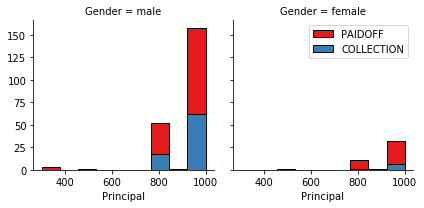

In [24]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col = 'Gender', hue = 'loan_status',palette = 'Set1', col_wrap = 2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

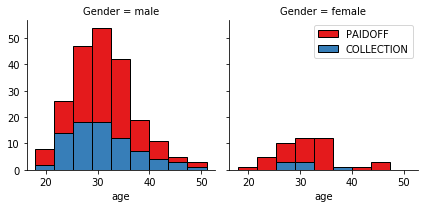

In [25]:
bins = np.linspace(df.age.min(), df.age.max(), 10)

g = sns.FacetGrid(df, col = "Gender", hue = 'loan_status', palette = 'Set1', col_wrap = 2)
g.map(plt.hist, 'age', bins = bins, ec = 'k')

g.axes[-1].legend()
plt.show()

In [26]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4


In [27]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if x > 3 else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [28]:
df.groupby(['Gender'])['loan_status'].value_counts()

Gender  loan_status
female  PAIDOFF         45
        COLLECTION       7
male    PAIDOFF        215
        COLLECTION      79
Name: loan_status, dtype: int64

In [29]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize = True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [30]:
df['Gender'].replace(to_replace = ['male', 'female'], value = [0, 1], inplace = True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [31]:
df.groupby(['education'])['loan_status'].value_counts(normalize = True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [32]:
df[['Principal', 'terms', 'age', 'Gender', 'weekend']].head()

,Principal,terms,age,Gender,weekend
0,1000,30,45,0,0
1,1000,30,33,1,0
2,1000,15,27,0,0
3,1000,30,28,1,1
4,1000,30,29,0,1


In [33]:
feature = df[['Principal', 'terms', 'age', 'Gender', 'weekend']]
feature = pd.concat([feature, pd.get_dummies(df['education'])], axis = 1)
feature.drop(['Master or Above'], axis = 1, inplace = True)
feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [34]:
X = feature
X[:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [35]:
y = df['loan_status'].values
y[:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X[:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

Test accuracy at k value 2 is: 0.6571428571428571
Test accuracy at k value 3 is: 0.7142857142857143
Test accuracy at k value 4 is: 0.6857142857142857
Test accuracy at k value 5 is: 0.7571428571428571
Test accuracy at k value 6 is: 0.7142857142857143
Test accuracy at k value 7 is: 0.7857142857142857
Test accuracy at k value 8 is: 0.7571428571428571
Test accuracy at k value 9 is: 0.7571428571428571


C:\Users\SRAVAN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\SRAVAN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\SRAVAN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavi

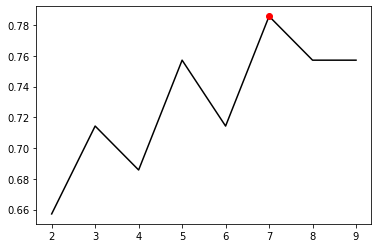

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_similarity_score
import matplotlib.pyplot as plt 
%matplotlib inline

scores = []
for i in range(2, 10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    
    y_pred = knn.predict(x_test)
    print("Test accuracy at k value {0} is: {1}".format(i, jaccard_similarity_score(y_test, y_pred)))
    scores.append(jaccard_similarity_score(y_test, y_pred))
    
plt.plot(range(2, 10), scores, 'black')

# max value
plt.plot(scores.index(max(scores)) + 2, max(scores), 'ro')

In [39]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [40]:
from sklearn.metrics import f1_score
y_pred = knn.predict(x_test)
f1_score(y_test, y_pred, average = 'weighted')

0.7766540244416351

In [41]:
jaccard_similarity_score(y_test, y_pred)

C:\Users\SRAVAN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.7857142857142857

### Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

liss = []
lis = []
for depth in range(3, 10):
    dtc = DecisionTreeClassifier(criterion="entropy", max_depth = depth)
    dtc.fit(x_train, y_train)
    y_pred = dtc.predict(x_test)
    liss.append(f1_score(y_test, y_pred, average='weighted'))
    lis.append(jaccard_similarity_score(y_test, y_pred))

result = pd.DataFrame(liss, index=['d = 3','d = 4', 'd = 5', 'd = 6','d = 7', 'd = 8', 'd = 9'])
result.columns = ['F1-score']
result.insert(loc=1, column='Jacard', value=lis)
result.columns.name = "Depth"
result

C:\Users\SRAVAN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\SRAVAN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\SRAVAN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavi

Depth,F1-score,Jacard
d = 3,0.644599,0.614286
d = 4,0.644599,0.614286
d = 5,0.674185,0.642857
d = 6,0.706479,0.771429
d = 7,0.697881,0.757143
d = 8,0.697881,0.757143
d = 9,0.675824,0.657143


In [43]:
result.sum(axis = 1)/2

d = 3    0.629443
d = 4    0.629443
d = 5    0.658521
d = 6    0.738954
d = 7    0.727512
d = 8    0.727512
d = 9    0.666484
dtype: float64

In [44]:
max(result.sum(axis = 1)/2)

0.7389539422326307

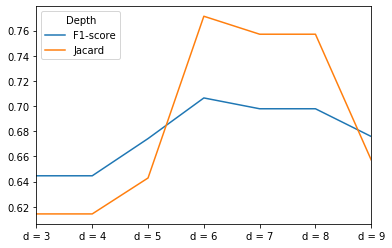

In [45]:
# result.plot(kind = 'bar')
result.plot(kind = 'line')

In [46]:
#at d = 6 we get max accuracy so
dtc = DecisionTreeClassifier(criterion = "entropy",max_depth = 6)
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
f1_score(y_test, y_pred, average = 'weighted')

0.7064793130366899

### SVM

In [47]:
from sklearn.svm import SVC

lis = ['linear', 'poly', 'rbf', 'sigmoid']
scores = []
for each in lis:
    svm = SVC(kernel = each)
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    scores.append(f1_score(y_test, y_pred, average = 'weighted'))

scores

C:\Users\SRAVAN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\SRAVAN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SRAVAN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SRAVAN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in

[0.6914285714285714,
 0.7064793130366899,
 0.7275882012724117,
 0.6892857142857144]

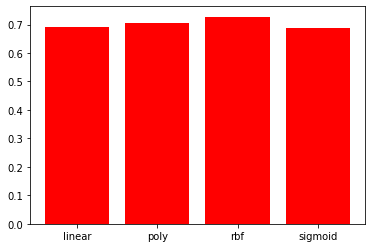

In [48]:
plt.bar(np.arange(len(lis)), scores, align = 'center', color = 'red')
plt.xticks(np.arange(len(lis)), lis)
plt.show()

In [49]:
svm = SVC(kernel = 'rbf')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
f1_score(y_test, y_pred, average = 'weighted')

C:\Users\SRAVAN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7275882012724117

### Logistic regression

Test  0 : Accuracy at c = 0.1 solver= newton-cg is :  0.48275353245267294
Test  1 : Accuracy at c = 0.1 solver= lbfgs is :  0.4827539604894662
Test  2 : Accuracy at c = 0.1 solver= liblinear is :  0.4981902487744225
Test  3 : Accuracy at c = 0.1 solver= sag is :  0.4827546089666545
Test  4 : Accuracy at c = 0.1 solver= saga is :  0.48274717884051666
Test  5 : Accuracy at c = 0.01 solver= newton-cg is :  0.492017801467927
Test  6 : Accuracy at c = 0.01 solver= lbfgs is :  0.4920179847937498
Test  7 : Accuracy at c = 0.01 solver= liblinear is :  0.5772287609479654
Test  8 : Accuracy at c = 0.01 solver= sag is :  0.4920316376215189
Test  9 : Accuracy at c = 0.01 solver= saga is :  0.4920166315353415
Test  10 : Accuracy at c = 0.001 solver= newton-cg is :  0.5181765961927621
Test  11 : Accuracy at c = 0.001 solver= lbfgs is :  0.5181766145124602
Test  12 : Accuracy at c = 0.001 solver= liblinear is :  0.670867975563743
Test  13 : Accuracy at c = 0.001 solver= sag is :  0.5181643991790418
T

Text(0, 0.5, 'Testing Accuracy')

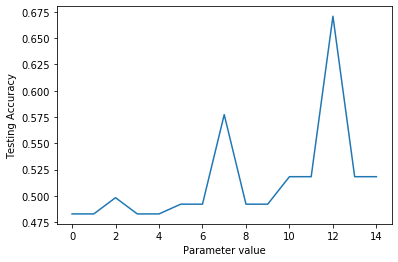

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

c_list = [0.1, 0.01, 0.001]
solver_list = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
idx = []

accuracy_score = []
for idx1, c in enumerate(c_list):
    for idx2, sol in enumerate(solver_list):
        idx.append(idx2 + idx1 * 5)
  
        LR = LogisticRegression(C=c, solver=sol).fit(x_train, y_train)
        
        lr_yhat = LR.predict(x_test)
        lr_prob = LR.predict_proba(x_test)
        print("Test ", (idx2 + idx1 * 5), ": Accuracy at c =", c,"solver=", sol,
              "is : ", log_loss(y_test, lr_prob))
        accuracy_score.append(log_loss(y_test, lr_prob))
lr_prob = LR.predict_proba(x_test)
log_loss(y_test, lr_prob)

plt.plot(idx, accuracy_score)
plt.xlabel('Parameter value')
plt.ylabel('Testing Accuracy')